We will use the athlete data from the previous noptebook. 
Load it into 2 arrays again. 

In [17]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np

# Cumulative Distributions

We've looked at distributions via histograms and saw that the distribution gives us quite a bit of information on what our data looks like. We can see the range of the data, where the density peaks, if the data follows a standard pattern, etc... Distributions are one of the fundamental descriptors of our data that we'll use for many purposes going forward. 

We can also look at another view of the distribution of the data - the cumulative distribution. The cumulative distribution shows us an accumulative total of the distribution of our data, or what fraction of the data is less than a certain point. 

### Arrays

For this example we'll also use a different data structure to a dataframe to hold our data - an array. Arrays are a very common data structure, we can think of it roughly like a numbered list of items. 

We'll need to use arrays for some things later on, we're looking at them here just to get an introduction. One cool thing about much of the functionality that we'll use is that many functions can accept data in many different formats - dataframes, series, arrays, lists, and more! All of these data structures have, to different degrees, overlapping characteristics - here the important characteristic is that they are all iterable, or they all hold things in something that can be treated like a "list of things". Because of this, we can feed in data that is in any of these data structures interchangeably and get the same results. We need to build our comfort level in using data that is stored differently. 

In [18]:
# PLEASE TAKE A LOOK AT THE NOTE IN THE COMMENTS IN THIS BLOCK.
dfNBA = pd.read_csv("data/NBA.csv")
dfNFL = pd.read_csv("data/NFL.csv")

# Take the height column and make a Series (effectively a 1D dataframe), with only 1 column:
nba = dfNBA["Height"]
nfl = dfNFL["Height (inches)"]

#################################################################
# Note: Originally when I showed this, the above two lines were slightly different. 
# They were (with the A added, obviously):
nbaA = np.array(dfNBA["Height"])
nflA = np.array(dfNFL["Height (inches)"])
# This code makes a slightly different data structure - a numpy array. 
# An array is a 1D data structure - effectively just a big list. 
# The code below works basically the same with either. That's because both are "iterable"
# That means (basically), something that has can give values one at a time. 
# Functions below can take either, with little/no change, or they can take a pandas Series
# Which is kind of a pandas take on an array. I point this out for a few reasons:
#  - Examples will sometimes show different data structures, and the rest of the code doesn't really change.
#  - Some things will need other data structures, most notably ML needs arrays.
# We don't need to understand the problem differently when different data structures are used.
# It is basically like getting groceries with a bin, a reusable bag, or a plastic bag.
# The all allow us to do the same thing (grocery shop/Machine Learn), and they can be used
# Largely interchabably. Sometimes one is better than the other for a specific task. 
# This type of thing is very common - you can do anything you want in code, so there are almost
# Always more than one way to do something. Flexible, but confusing. 

# Dump the non-numbers
nba = nba[~np.isnan(nba)]
nfl = nfl[~np.isnan(nfl)]

#### Data Structures and Basic Statistics

No matter the type of data structure, the statistics that describe it remain the same. 

We are used to the Pandas statistic functions - these are functions that are built into the Pandas Dataframe objects, we can tell by the syntax of "dataframe.function()". These functions "belong" to the dataframe, so they only work with that object. 

In [19]:
dfNFL["Weight (lbs)"].mean(), dfNFL["Weight (lbs)"].std()

(229.22066468080135, 42.73273161153381)

In [20]:
dfNFL.columns

Index(['Age', 'Birth Place', 'Birthday', 'College', 'Current Status',
       'Current Team', 'Experience', 'Height (inches)', 'High School',
       'High School Location', 'Name', 'Number', 'Player Id', 'Position',
       'Weight (lbs)', 'Years Played'],
      dtype='object')

On the other hand, arrays are not Pandas Dataframes, so they don't have those functions available to them. To get stats like the mean we need to use a different function. If we look at the function calls below they are in the format "numpy.function()" - this is an indicator that the function is not something that "belongs" to the data structure object itself, rather the function can be called with any data that we provide as an argument. 

This distinction is minor now, but will become more clear and relevant as you get experience programming. 

In [21]:
#Check the means
print("NBA Mean Height: "+str(np.mean(nba)))
print("NFL Mean Height: "+str(np.mean(nfl)))

NBA Mean Height: 197.44075829383885
NFL Mean Height: 73.50839891929989


#### Applying Functions

One thing that is often useful is to do bulk actions on our data, for example to convert between cm and inches. Rather than trying to do something complex like loop through each row of the data and generate the calculation, we can state the calculation and tell our program to apply it to every row. 

This apply function will have the effect of applying whatever calculation defined (x * 2.54) to each item in that array. 

In [22]:
#Correct the heights to cm, so they are the same as NBA
#This .apply() applies the function inside to an entire DF
#The "lambda x" basically means "grab each row one by one, and that row is (temporarily) x"
#The part after the colon means "take x, and do this to it"
#So this will, more or less, grab each row, and do the function after the colon, one row at a time.
nfl = nfl.apply(lambda x: x*2.54)
nfl

0        180.34
1        177.80
2        187.96
3        185.42
4        195.58
          ...  
17167    180.34
17168    190.50
17169    182.88
17170    185.42
17171    185.42
Name: Height (inches), Length: 17026, dtype: float64

## Percentiles

The previous 2 methods of looking at the distribution showed us versions of "how many of X are Y" - e.g. how many players are 187cm tall. 

We may also want/need to look at cumulative measurements - "how many of X are over/under Y" - e.g. how many players are over 215cm, or under 172.523cm. Enter percentiles...

Percentiles measure how far along the scale a value is - how many items a value is larger than, and the inverse, how many are higher than it. E.g. if you are in a class of 10 people, and you are the second tallest, you are in the 90th percentile of height - 90% of people in that sample are the same or shorter than you; the remaining 10% are taller. If you've been scored on a standardized test, you've probably gotten some kind of number like this. (The book has a more thorough explationation of percentile stuff)

In order to calculate things, we need two functions that are basically inverses of eachother. Percentile rank takes in a value and calculates what percentile that is in. Percentile does the opposite, takes in a percentile, and calculates the value. (Read the book on this, it has the details)
Percentile rank: value->ranking on percentile scale. e.g. I scored 72%, and the function tells me I'm in the 80th percentile. 
percentile: ranking->value. e.g. I'm in the 64th percentile of my graduating class, that means I have a 3.1 GPA.

In [23]:
#The percentile functions
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

def Percentile2(scores, percentile_rank):
    scores.sort()
    index = percentile_rank * (len(scores)-1) // 100
    return scores[index]

def EvalCdf(sample, x):
    count = 0.0
    for value in sample:
        if value <= x:
            count += 1

    prob = count / len(sample)
    return prob

### Visualizing a CDF

The CDF is basically a different look at the percentile rank - given a value, how far "up the scale" are we.

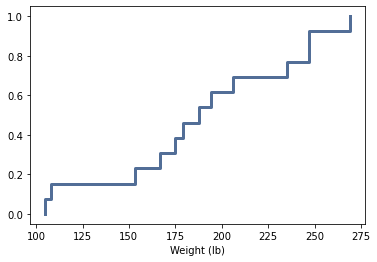

<Figure size 576x432 with 0 Axes>

In [24]:
#Simple dummy example
#Pretend these are weights in pounds
sample = thinkstats2.Cdf([105,235,153,194,175,206,167,188,179,108,247,269,247])
thinkplot.Cdf(sample)
thinkplot.Show(xlabel="Weight (lb)")

We can read these CDF graphs like this... If I am 225lb, I can look that up on the x-axis. The corresponding y value is my percentile rank - I'm in apx the 70th percentile, or I'm heavier than about 70% of the people in the sample. 

How does the shape of a CDF relate to the shape of a PDF? With different standard deviations? Create a CDF with the numbers 1-10, what does that look like? What can you infer about the distribution?

Create a CDF for both the NBA and NFL heights. How does that relate back to the histograms? 

{'xscale': 'linear', 'yscale': 'linear'}

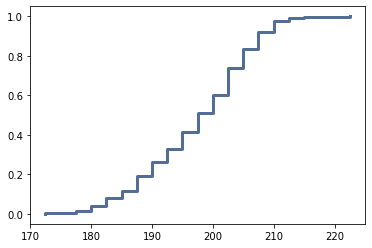

In [25]:
#Create and show CDF of NBA heights
nba_cdf = thinkstats2.Cdf(nba)
thinkplot.Cdf(nba_cdf)

{'xscale': 'linear', 'yscale': 'linear'}

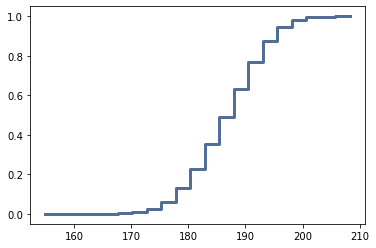

In [26]:
#Create and show CDF of NFL heights
nfl_cdf = thinkstats2.Cdf(nfl)
thinkplot.Cdf(nfl_cdf)

Ok, we can run some calculations. 

Make both into inches, round to 1 inch. The reason for this conversion and rounding is so that there are more results for each value because inches are "bigger". This isn't "needed", but it makes this more clear to visualize. 

In [27]:
# Convert to inches and make CDFs
nbaIn = nba.apply(lambda x: x/2.54)
nflIn = nfl.apply(lambda x: x/2.54)
nbaIn = round(nbaIn, 0)
nflIn = round(nflIn, 0)
#Make CDF objects with the rounded stuff
nbaRounded = thinkstats2.Cdf(nbaIn)
nflRounded = thinkstats2.Cdf(nflIn)

In [28]:
nflIn.describe()

count    17026.000000
mean        73.508399
std          2.577632
min         61.000000
25%         72.000000
50%         74.000000
75%         75.000000
max         82.000000
Name: Height (inches), dtype: float64

## Exercises

Try these! 

<ul>
<li> What is the probability that someone in the NBA is 80in tall?
<li> What is the probability someone is over 74in in the NFL?
<li> How tall does someone need to be to get into the 75th percentile in each dataset?
<li> What is your percentile rank in each dataset? 
</ul>

In [29]:
#E.g. What is the probability that someone in the NBA is 80in tall
nbaRounded.Prob(80)
#And if we want to see in in pretty printing
print(str(round(nbaRounded.Prob(80), 3)*100)+"%")

#And if someone is over 74in in the NFL?
#Think about why there's the extra math in there.
res = PercentileRank(nflIn, 74)
print(str(round((1-res), 1)*-1)+"%")

73.9%
62.3%


In [30]:
#Using the Percentile/Rank functions, and the CDF functions on pg 49 of the book
#Can you look for anything interesting in the data?
#Who's over X, who's under? How you'd your height score on the scale?
#If someone is in the top 20% of NFL height, how to they rank in the NBA?
#How many people are shorter than you (or a friend) in either leauge?